In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
# 유니코드 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔 고딕 폰트 적용
mpl.rcParams['font.family'] = 'NanumGothic'

## 2. 브리지 테스트

In [42]:
vertex = int(input("정점개수를 입력:> "))
vertex_list = list(range(0, vertex))
edge = int(input("간선개수를 입력:> "))
adj_list = [ [] for _ in range(edge)]

n = 0
while(n < edge):
    x, y = map(int, input("간선의 양 끝점을 입력하고 엔터를 누르시오:> ").split())
    adj_list[x].append(y)
    adj_list[y].append(x)
    n = n+1

정점개수를 입력:> 3
간선개수를 입력:> 3
간선의 양 끝점을 입력하고 엔터를 누르시오:> 0 1
간선의 양 끝점을 입력하고 엔터를 누르시오:> 1 2
간선의 양 끝점을 입력하고 엔터를 누르시오:> 0 2


In [3]:
# 전체 정점 확인
vertex_list

[0, 1, 2]

In [4]:
# 전체 인접 리스트 확인
adj_list

[[1, 2], [0, 2], [1, 0]]

In [5]:
# 브리지 찾기
def find_bridge(v1, v2=-1):
    try:
        adj = adj_list[v1] # 해당 정점의 이웃 정점 추출
        if v2==-1: # v1의 브리지를 확인하고자 v2의 값을 입력하지 않은 경우
            print(str(v1) + "의 브리지는 " + str(adj) + "과 연결되어 있습니다.")
            return
        tmp = adj_list[v2] # v2가 존재하는 정점인지 확인
        if(v2 in adj): # v2가 v1의 이웃 정점일 때
            print("두 정점은 브리지입니다.")
        else: # v2가 v1의 이웃 정점이 아닐 때
            print("두 정점은 브리지가 아닙니다.")
    except: # 입력한 정점이 존재하지 않을 때
        print("해당 정점은 존재하지 않습니다.")

In [6]:
find_bridge(1, 3)

해당 정점은 존재하지 않습니다.


In [7]:
find_bridge(0, 2)

두 정점은 브리지입니다.


In [8]:
find_bridge(4, 5)

해당 정점은 존재하지 않습니다.


In [9]:
find_bridge(0)

0의 브리지는 [1, 2]과 연결되어 있습니다.


## 3. 멀티 센터 문제

In [10]:
# MST 트리로 센터 구하기
def MST_center(node_x, node_y, num_center=1):
    distances = {} # 해당 정점과 모든 정점 사이의 거리
    for i in range(len(node_x)):
        for j in range(len(node_x)):
            a = node_x[i] - node_x[j]
            b = node_y[i] - node_y[j]
            dist = math.sqrt((a*a) + (b*b))
            distances[str(i)+":"+str(j)] = dist

    sort = dict(sorted(distances.items(), key=lambda x:x[1]))
    sort = {key:value for key, value in sort.items() if value != 0.0}
    s = list(sort.keys())
    edges = [-1 for _ in range(len(node_x))] # 간선을 저장
    edges_xy = [[0 for _ in range(len(node_x))], [0 for _ in range(len(node_x))]]
    for i in range(len(edges)):
        for j in range(len(s)):
            sts, ends = s[j].split(':')
            st = int(sts) # 간선 시작되는 정점
            end = int(ends) # 간선 끝나는 정점
            cycle = False
            if(edges[st] == -1): # 간선에 들어갈 수 있음
                tmp = edges[end]
                for k in range(len(edges)):
                    if tmp == st:
                        cycle = True # 사이클 형성
                        break
                    elif tmp == -1:
                        break
                    else:
                        tmp = edges[tmp]
                if cycle:
                    continue
                edges[st] = end # 사이클이 형성되지 않음이 확인되면 최종적으로 간선을 저장
                edges_xy[0][st] = node_x[end]
                edges_xy[1][st] = node_y[end]
                
    sort = dict(sorted(distances.items(), key=lambda x:x[1], reverse=True))
    sort = {key:value for key, value in sort.items() if value != 0.0}
    s = list(sort.keys())
    f = [-1 for _ in range(len(node_x))]
    dist_far = [] # 센터 지정을 위해 각 정점에서 가장 먼 거리가 어느정도인지 저장하는 공간
    for i in range(len(f)):
        for j in range(len(s)):
            sts, ends = s[j].split(':')
            st = int(sts) # 간선 시작되는 정점
            end = int(ends) # 간선 끝나는 정점
            if f[st] == -1:
                f[st] = s[j]
                dist_far.append(st)
    dist_far.reverse()

    center = dist_far[0:num_center] # 매개변수로 입력받았던 센터의 수만큼 센터 추출
    center_xy = [[], []]
    ver_cen = [[] for _ in range(len(center))]
    for i in range(len(center)):
        center_xy[0].append(node_x[center[i]])
        center_xy[1].append(node_y[center[i]])
        for j in range(len(node_x)):
            ver_cen[i].append(distances[str(j)+":"+str(center[i])]) # 센터별 모든 정점들과의 거리 저장
    near_cen = []
    vertex_x = [[] for _ in range(len(center))]
    vertex_y = [[] for _ in range(len(center))]
    for i in range(len(node_x)):
        min_d = 1000
        min_c = 0
        for j in range(len(center)):
            if(min_d > ver_cen[j][i]):
                min_d = ver_cen[j][i]
                min_c = center[j]
        near_cen.append(min_c) # 각 정점이 어떤 센터와 가까운지 저장
    for i in range(len(center)):
        for j in range(len(node_x)):
            if(near_cen[j] == center[i]):
                vertex_x[i].append(node_x[j])
                vertex_y[i].append(node_y[j])
    
    ### 그래프 출력 ###
    plt.figure(figsize=(10, 10))
    for i in range(len(center)):  
        color = ["#"+''.join([random.choice('123456789ABCDE') for j in range(6)])] # 정점의 색은 랜덤으로 지정
        plt.scatter(vertex_x[i], vertex_y[i], color=color, s=150) # 일반 정점
        plt.scatter(center_xy[0][i], center_xy[1][i], color=color, s=500) # 센터인 정점
    for i in range(len(edges_xy[0])):
        if edges[i] == -1:
            continue
        plt.plot([node_x[i], edges_xy[0][i]], [node_y[i], edges_xy[1][i]], color='b', linewidth=2) # 간선 잇기
    plt.xticks(np.arange(0, 110, 10))
    plt.yticks(np.arange(0, 110, 10))
    plt.grid()
    plt.annotate("  센터의 크기는 다른 정점보다 큼, 각 정점의 색은 가까운 센터의 색과 동일\n\n  정점의 색은 랜덤으로 부여했으므로 색 구별이 어려운 경우 다시 실행", (100, 80))
    plt.show()

    return edges_xy[0], edges_xy[1], center_xy[0], center_xy[1]

In [38]:
node_x = [10, 20, 40, 70, 50, 90, 80, 40, 30, 60]
node_y = [10, 30, 60, 20, 80, 40, 70, 50, 30, 30]

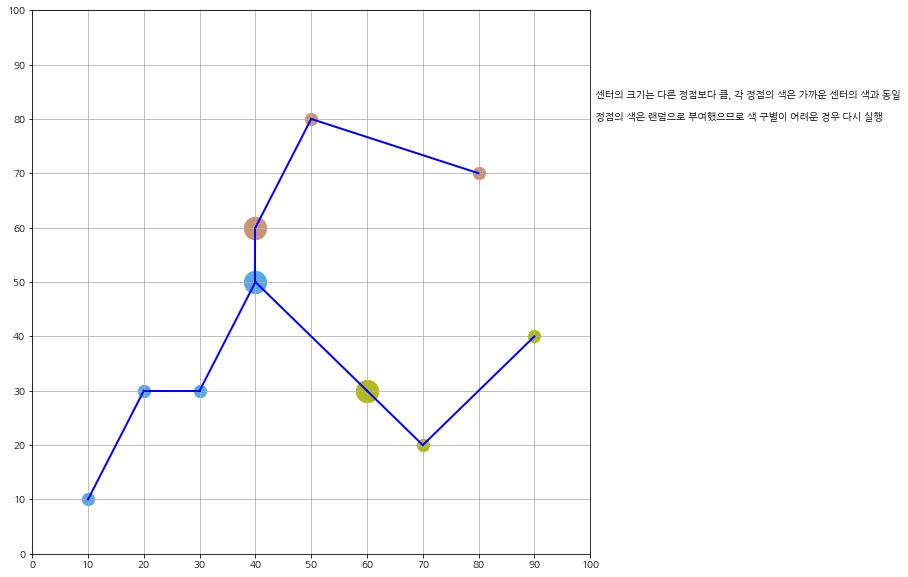

In [39]:
edge_x, edge_y, center_x, center_y = MST_center(node_x, node_y, 3)

In [40]:
print(edge_x)
print(edge_y)

[20, 30, 40, 60, 40, 70, 50, 30, 0, 40]
[30, 30, 50, 30, 60, 20, 80, 30, 0, 50]


In [41]:
print(center_x)
print(center_y)

[40, 60, 40]
[50, 30, 60]


In [29]:
node_x = [50, 70, 20, 80, 90, 10, 60, 80, 80, 20]
node_y = [60, 30, 40, 10, 80, 50, 40, 30, 60, 20]

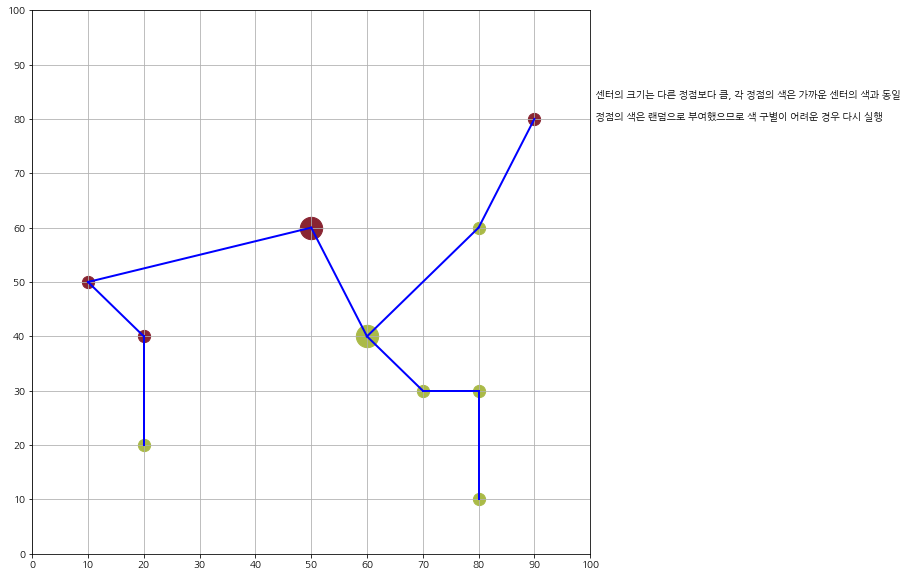

In [30]:
edge_x, edge_y, center_x, center_y = MST_center(node_x, node_y, 2)

In [31]:
print(edge_x)
print(edge_y)

[60, 80, 10, 80, 80, 50, 70, 0, 60, 20]
[40, 30, 50, 30, 60, 60, 30, 0, 40, 40]


In [32]:
print(center_x)
print(center_y)

[60, 50]
[40, 60]


In [33]:
node_x = [10, 20, 40, 70, 50, 90, 80, 40, 30, 60, 70, 50, 20, 10, 50, 60, 90, 20, 40, 30]
node_y = [10, 30, 60, 20, 90, 40, 70, 50, 30, 30, 30, 40, 60, 30, 60, 80, 10, 50, 10, 60]

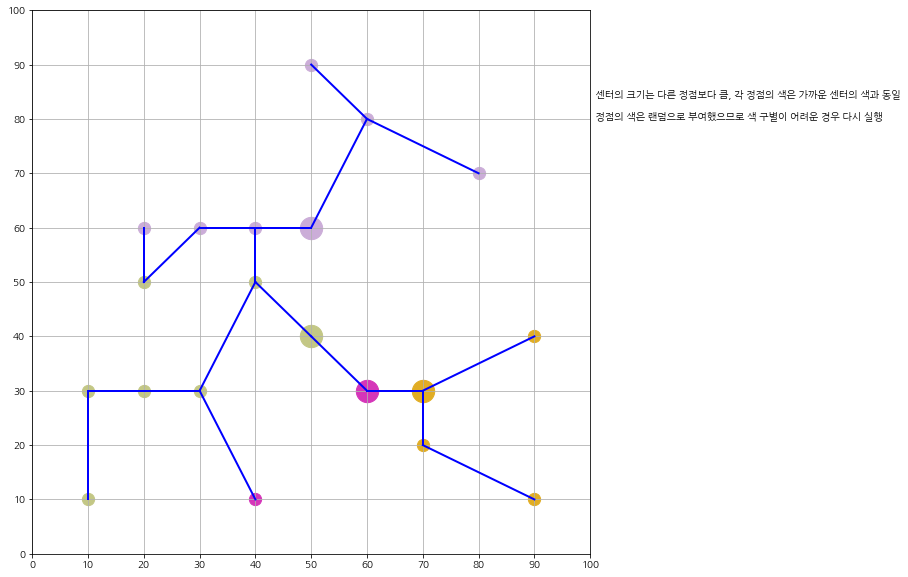

In [34]:
edge_x, edge_y, center_x, center_y = MST_center(node_x, node_y, 4)

In [35]:
print(edge_x)
print(edge_y)

[10, 30, 40, 70, 60, 70, 60, 50, 40, 70, 0, 60, 20, 20, 40, 50, 70, 30, 30, 40]
[30, 30, 50, 30, 80, 30, 80, 40, 50, 30, 0, 30, 50, 30, 60, 60, 20, 60, 30, 60]


In [36]:
print(center_x)
print(center_y)

[50, 60, 70, 50]
[40, 30, 30, 60]
